## The following code utilizes PyCaret to automate model selection and analysis. 

Pycaret is an automated model selection, training, and comparison package requiring very little coding to automoate. 


##### www.pycaret.org

This particular example is taken from the following article and Git repository
####  1. Article
https://towardsdatascience.com/pycaret-better-machine-learning-with-python-58b202806d1e

####  2. Repository
https://github.com/betterdatascience/YouTube/blob/master/0005_PyCaret.ipynb



### Install pycaret, upload diabetes dataset, establish classifier model

In [1]:
### install

from pycaret.classification import *
from pycaret.datasets import get_data

diabetes = get_data('diabetes')
print("Length of dataset is {}".format(len(diabetes)))
exp_clf = setup(diabetes, target = 'Class variable')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,6618
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(768, 9)"
4,Missing Values,False
5,Numeric Features,7
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [2]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.772800,0.815900,0.614300,0.704800,0.651600,0.484900
1,Gradient Boosting Classifier,0.771000,0.827300,0.614900,0.707700,0.653300,0.483700
2,Ridge Classifier,0.763500,0.000000,0.524000,0.728900,0.605600,0.443600
3,Linear Discriminant Analysis,0.763500,0.814100,0.539800,0.717300,0.612700,0.447700
4,Extreme Gradient Boosting,0.763400,0.821400,0.625100,0.678600,0.645800,0.469400
5,Logistic Regression,0.756100,0.810400,0.518700,0.720100,0.599100,0.429800
6,Light Gradient Boosting Machine,0.752200,0.798300,0.629500,0.651100,0.635900,0.449000
7,Ada Boost Classifier,0.752100,0.789800,0.571100,0.674900,0.614200,0.434100
8,K Neighbors Classifier,0.744900,0.764200,0.561100,0.665600,0.604300,0.418800
9,Extra Trees Classifier,0.744900,0.795900,0.540600,0.683200,0.593600,0.412700


### Setup best model for classification prediction from model compare

In [3]:
xgb = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7963,0.8331,0.5263,0.8333,0.6452,0.5123
1,0.6852,0.7308,0.5263,0.5556,0.5405,0.3014
2,0.7407,0.8256,0.6842,0.6190,0.6500,0.4449
3,0.7593,0.7910,0.6316,0.6667,0.6486,0.4658
4,0.7593,0.8571,0.5789,0.6875,0.6286,0.4524
5,0.8889,0.9038,0.7895,0.8824,0.8333,0.7504
6,0.7593,0.8060,0.7368,0.6364,0.6829,0.4906
7,0.6981,0.7810,0.5000,0.5625,0.5294,0.3083
8,0.8113,0.9190,0.7778,0.7000,0.7368,0.5904
9,0.7358,0.7667,0.5000,0.6429,0.5625,0.3775


### Visualize the model performance

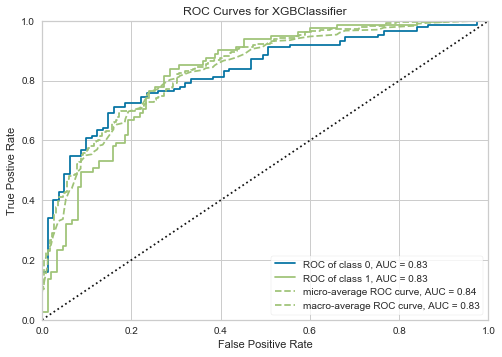

In [4]:
plot_model(xgb)

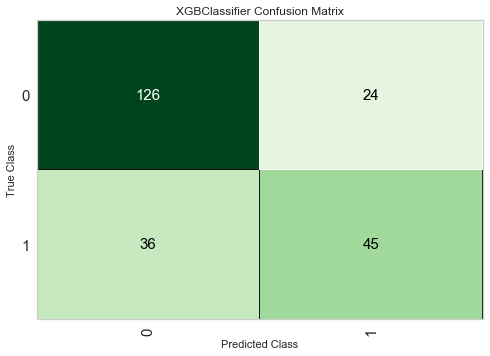

In [5]:
plot_model(xgb, 'confusion_matrix')

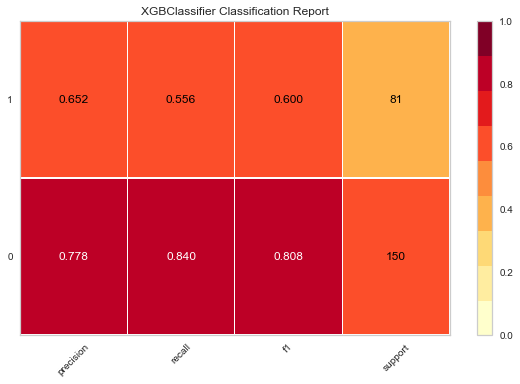

In [6]:
plot_model(xgb, 'class_report')

### Model interpretation with SHAP
Utilize SHAP value do determine feature impact on model output


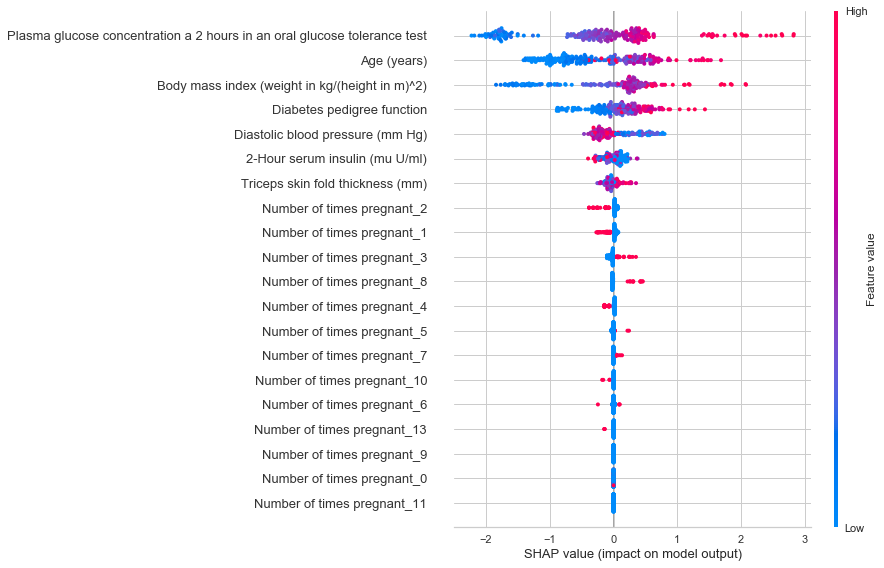

In [7]:
interpret_model(xgb)

In [8]:
predictions = predict_model(xgb)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extreme Gradient Boosting,0.7403,0.8272,0.5556,0.6522,0.6,0.4095


### Model saving and loading

In [9]:
finalize_model(xgb)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=6618,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=0)

In [10]:
save_model(xgb, 'diabetes_xgboost')

Transformation Pipeline and Model Succesfully Saved


In [11]:
model = load_model('diabetes_xgboost')

Transformation Pipeline and Model Sucessfully Loaded


### Model deployment

The following is an example how to deploy the model via AWS if one has established authentication. For reference only. 

In [ ]:
deploy_model(
    model,
    model_name = 'diabetes_aws',
    platform = 'aws',
 authentication = {'bucket': 'pycaret-test'}
)